In [1]:
%matplotlib inline


Colormap Normalization
======================

Objects that use colormaps by default linearly map the colors in the
colormap from data values *vmin* to *vmax*.  For example::

    pcm = ax.pcolormesh(x, y, Z, vmin=-1., vmax=1., cmap='RdBu_r')

will map the data in *Z* linearly from -1 to +1, so *Z=0* will
give a color at the center of the colormap *RdBu_r* (white in this
case).

Matplotlib does this mapping in two steps, with a normalization from
[0,1] occurring first, and then mapping onto the indices in the
colormap.  Normalizations are classes defined in the
:func:`matplotlib.colors` module.  The default, linear normalization is
:func:`matplotlib.colors.Normalize`.

Artists that map data to color pass the arguments *vmin* and *vmax* to
construct a :func:`matplotlib.colors.Normalize` instance, then call it:

.. ipython::

   In [1]: import matplotlib as mpl

   In [2]: norm = mpl.colors.Normalize(vmin=-1.,vmax=1.)

   In [3]: norm(0.)
   Out[3]: 0.5

However, there are sometimes cases where it is useful to map data to
colormaps in a non-linear fashion.

Logarithmic
-----------

One of the most common transformations is to plot data by taking
its logarithm (to the base-10).  This transformation is useful to
display changes across disparate scales.  Using :func:`colors.LogNorm`
normalizes the data via $log_{10}$.  In the example below,
there are two bumps, one much smaller than the other. Using
:func:`colors.LogNorm`, the shape and location of each bump can clearly
be seen:



/home/salas/miniconda3/envs/storytelling/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


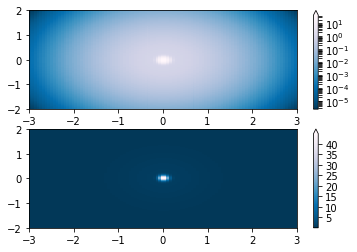

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale so we see both hump and spike.  linear
# scale only shows the spike.
Z1 = np.exp(-(X)**2 - (Y)**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolor(X, Y, Z, cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[1], extend='max')
fig.show()

Symmetric logarithmic
---------------------

Similarly, it sometimes happens that there is data that is positive
and negative, but we would still like a logarithmic scaling applied to
both.  In this case, the negative numbers are also scaled
logarithmically, and mapped to smaller numbers; e.g., if `vmin=-vmax`,
then they the negative numbers are mapped from 0 to 0.5 and the
positive from 0.5 to 1.

Since the logarithm of values close to zero tends toward infinity, a
small range around zero needs to be mapped linearly.  The parameter
*linthresh* allows the user to specify the size of this range
(-*linthresh*, *linthresh*).  The size of this range in the colormap is
set by *linscale*.  When *linscale* == 1.0 (the default), the space used
for the positive and negative halves of the linear range will be equal
to one decade in the logarithmic range.



/home/salas/miniconda3/envs/storytelling/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


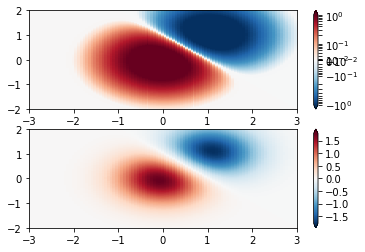

In [3]:
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-1.0, vmax=1.0),
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z))
fig.colorbar(pcm, ax=ax[1], extend='both')
fig.show()

Power-law
---------

Sometimes it is useful to remap the colors onto a power-law
relationship (i.e. $y=x^{\gamma}$, where $\gamma$ is the
power).  For this we use the :func:`colors.PowerNorm`.  It takes as an
argument *gamma* (*gamma* == 1.0 will just yield the default linear
normalization):

<div class="alert alert-info"><h4>Note</h4><p>There should probably be a good reason for plotting the data using
   this type of transformation.  Technical viewers are used to linear
   and logarithmic axes and data transformations.  Power laws are less
   common, and viewers should explicitly be made aware that they have
   been used.</p></div>



/home/salas/miniconda3/envs/storytelling/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


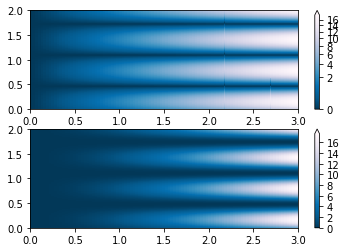

In [4]:
N = 100
X, Y = np.mgrid[0:3:complex(0, N), 0:2:complex(0, N)]
Z1 = (1 + np.sin(Y * 10.)) * X**(2.)

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z1, norm=colors.PowerNorm(gamma=0.5),
                       cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[1], extend='max')
fig.show()

Discrete bounds
---------------

Another normaization that comes with matplolib is
:func:`colors.BoundaryNorm`.  In addition to *vmin* and *vmax*, this
takes as arguments boundaries between which data is to be mapped.  The
colors are then linearly distributed between these "bounds".  For
instance:

.. ipython::

  In [2]: import matplotlib.colors as colors

  In [3]: bounds = np.array([-0.25, -0.125, 0, 0.5, 1])

  In [4]: norm = colors.BoundaryNorm(boundaries=bounds, ncolors=4)

  In [5]: print(norm([-0.2,-0.15,-0.02, 0.3, 0.8, 0.99]))
  [0 0 1 2 3 3]

Note unlike the other norms, this norm returns values from 0 to *ncolors*-1.



/home/salas/miniconda3/envs/storytelling/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


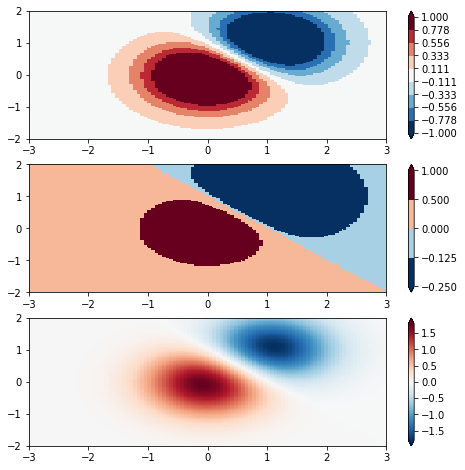

In [5]:
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots(3, 1, figsize=(8, 8))
ax = ax.flatten()
# even bounds gives a contour-like effect
bounds = np.linspace(-1, 1, 10)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=norm,
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both', orientation='vertical')

# uneven bounds changes the colormapping:
bounds = np.array([-0.25, -0.125, 0, 0.5, 1])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[1].pcolormesh(X, Y, Z, norm=norm, cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[1], extend='both', orientation='vertical')

pcm = ax[2].pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z))
fig.colorbar(pcm, ax=ax[2], extend='both', orientation='vertical')
fig.show()

Custom normalization: Two linear ranges
---------------------------------------

It is possible to define your own normalization.  In the following
example, we modify :func:`colors:SymLogNorm` to use different linear
maps for the negative data values and the positive.  (Note that this
example is simple, and does not validate inputs or account for complex
cases such as masked data)

<div class="alert alert-info"><h4>Note</h4><p>This may appear soon as :func:`colors.OffsetNorm`.

   As above, non-symmetric mapping of data to color is non-standard
   practice for quantitative data, and should only be used advisedly.  A
   practical example is having an ocean/land colormap where the land and
   ocean data span different ranges.</p></div>



/home/salas/miniconda3/envs/storytelling/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


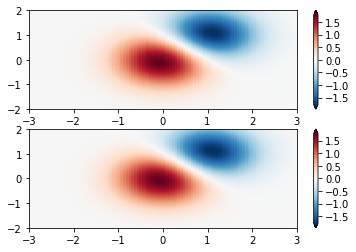

In [6]:
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2


class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=MidpointNormalize(midpoint=0.),
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z))
fig.colorbar(pcm, ax=ax[1], extend='both')
fig.show()